### 📐K-최근접 이웃 알고리즘(K-Nearest Neighbor, KNN)
- 임의의 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.
- 가장 간단한 머신러닝 알고리즘으로서, 직관적이고 나름 성능도 괜찮다.
- K를 어떻게 정하냐에 따라 결과 값이 바뀔 수 있다. K는 임의의 데이터가 주어졌을 때 가까운 이웃들의 개수이며, default값은 5이다.  
- K는 가장 가까운 5개의 이웃 데이터를 기반으로 분류하며, 일반적으로 홀수를 사용한다. 짝수일 경우 동점이 되어 하나의 결과를 도출할 수 없기 때문이다.
<div style="width: 80%; display: flex; margin-left: -20px; margin-bottom: 20px;">
    <div>
        <img src="./images/knn01.png">
    </div>
    <div>
        <img src="./images/knn02.png">
    </div>
</div>
- KNN은 fit을 통해 훈련을 시키면, 학습하지 않고 저장만 해놓기 때문에, Lazy Model이라 부른다.
- 새로운 데이터가 주어지면 그제서야 이웃 데이터를 보고 분류해나간다. 따라서 사전 모델링이 필요 없는 real-time 예측이 이루어진다.
- 미리 선을 그어놓거나 나눌 생각이 없기 때문에, SVM이나 선형 회귀보다 빠르다.
<img src="./images/knn03.jpg" width="350" style="margin:10px; margin-left: 0px">
- 데이터와 데이터 사이의 거리를 구해야 더 가까운 클래스로 분류할 수 있으며,  
이는 유클리드 거리(Euclidean Distance)방식과 맨해튼 거리(Manhattan Distance) 방식이 있다(/data-analysis/a_Numpy 에 있는 노름(Norm) 참조).

##### 코로나 바이러스(COVID) 예측

In [1]:
import pandas as pd

corona_df = pd.read_csv('./datasets/corona.csv', low_memory=False)
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


##### 결측치 검사

In [2]:
corona_df.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [3]:
corona_df = corona_df[~corona_df['Cough_symptoms'].isna()]
corona_df = corona_df[~corona_df['Fever'].isna()]
corona_df = corona_df[~corona_df['Sore_throat'].isna()]
corona_df = corona_df[~corona_df['Headache'].isna()]
corona_df['Age_60_above'] = corona_df['Age_60_above'].fillna('No')
corona_df['Sex'] = corona_df['Sex'].fillna('unknown')
corona_df.isna().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

##### 중복행 검사

In [4]:
corona_df.duplicated().sum()

0

In [5]:
corona_df['Target'] = corona_df['Corona']

In [6]:
corona_df.drop(columns='Corona', axis=1, inplace=True)

In [7]:
corona_df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Target
0,1,11-03-2020,True,False,True,False,False,No,unknown,Abroad,negative
1,2,11-03-2020,False,True,False,False,False,No,unknown,Abroad,positive
2,3,11-03-2020,False,True,False,False,False,No,unknown,Abroad,positive
3,4,11-03-2020,True,False,False,False,False,No,unknown,Abroad,negative
4,5,11-03-2020,True,False,False,False,False,No,unknown,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,No,male,Other,positive
278844,278845,30-04-2020,False,False,False,False,False,No,female,Other,negative
278845,278846,30-04-2020,False,False,False,False,False,No,male,Other,negative
278846,278847,30-04-2020,False,False,False,False,False,No,male,Other,negative


In [8]:
corona_df['Target'].value_counts()

Target
negative    260008
positive     14694
other         3892
Name: count, dtype: int64

In [9]:
corona_df = corona_df[corona_df['Target'] != 'other']

In [10]:
corona_df['Target'].value_counts()

Target
negative    260008
positive     14694
Name: count, dtype: int64

##### 레이블 인코딩

In [11]:
from sklearn.preprocessing import LabelEncoder

columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Target']

for column in columns:
    encoder = LabelEncoder()
    targets = encoder.fit_transform(corona_df[column])
    corona_df.loc[:, column] = targets
    print(f'{column}_classes: {encoder.classes_}')

Cough_symptoms_classes: [False True]
Fever_classes: [False True]
Sore_throat_classes: [False True]
Shortness_of_breath_classes: [False True]
Headache_classes: [False True]
Age_60_above_classes: ['No' 'Yes']
Target_classes: ['negative' 'positive']


In [12]:
corona_df = corona_df.drop(columns=['Ind_ID', 'Test_date', 'Sex', 'Known_contact'], axis=1)
corona_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Target
0,1,0,1,0,0,0,0
1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1
278844,0,0,0,0,0,0,0
278845,0,0,0,0,0,0,0
278846,0,0,0,0,0,0,0


In [13]:
corona_df = corona_df.reset_index(drop=True)
corona_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Target
0,1,0,1,0,0,0,0
1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
274697,0,0,0,0,0,0,1
274698,0,0,0,0,0,0,0
274699,0,0,0,0,0,0,0
274700,0,0,0,0,0,0,0


In [14]:
# 각 카테고리 값을 정수 타입으로 변환 !
corona_df = corona_df.astype('int16')
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274702 entries, 0 to 274701
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       274702 non-null  int16
 1   Fever                274702 non-null  int16
 2   Sore_throat          274702 non-null  int16
 3   Shortness_of_breath  274702 non-null  int16
 4   Headache             274702 non-null  int16
 5   Age_60_above         274702 non-null  int16
 6   Target               274702 non-null  int16
dtypes: int16(7)
memory usage: 3.7 MB


##### 하이퍼 파라미터 튜닝 및 교차 검증

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()

grid_knn = GridSearchCV(k_neighbors_classifier, {'n_neighbors': [3, 5, 7]}, cv=3, refit=True, return_train_score=True, n_jobs=4)

##### 훈련 데이터 세트와 테스트 데이터 세트 분리

In [16]:
from sklearn.model_selection import train_test_split

features, targets = corona_df.iloc[:,:-1], corona_df.Target

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.5, stratify=targets)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

##### 평가
- 오차 행렬
- 정확도
- 정밀도
- 재현율
- F1 score
- ROC-AUC

In [22]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [23]:
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [25]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction = grid_knn.predict(X_test)
prediction_proba = grid_knn.predict_proba(X_test)[:, 1].reshape(-1, 1)
precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba)

get_evaluation_by_thresholds(y_test, prediction_proba, thresholds)

임곗값: 0.0
오차 행렬
[[123763   6241]
 [  4187   3160]]
정확도: 0.9241, 정밀도: 0.3361, 재현율: 0.4301, F1:0.3774, AUC:0.6911
###########################################################################
임곗값: 0.14285714285714285
오차 행렬
[[129017    987]
 [  5081   2266]]
정확도: 0.9558, 정밀도: 0.6966, 재현율: 0.3084, F1:0.4275, AUC:0.6504
###########################################################################
임곗값: 0.42857142857142855
오차 행렬
[[129613    391]
 [  5434   1913]]
정확도: 0.9576, 정밀도: 0.8303, 재현율: 0.2604, F1:0.3964, AUC:0.6287
###########################################################################
임곗값: 0.5714285714285714
오차 행렬
[[129689    315]
 [  5606   1741]]
정확도: 0.9569, 정밀도: 0.8468, 재현율: 0.2370, F1:0.3703, AUC:0.6173
###########################################################################
임곗값: 0.7142857142857143
오차 행렬
[[129868    136]
 [  5914   1433]]
정확도: 0.9560, 정밀도: 0.9133, 재현율: 0.1950, F1:0.3214, AUC:0.5970
###########################################################################
임곗값

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 기존 타겟 데이터가 불균형하기 때문에, 균형을 맞추기 위해 데이터를 축소한다.

In [26]:
corona_df['Target'].value_counts()

Target
0    260008
1     14694
Name: count, dtype: int64

In [31]:
target_0 = corona_df[corona_df['Target'] == 0].sample(14694)
target_1 = corona_df[corona_df['Target'] == 1]

balance_corona_df = pd.concat([target_0, target_1])
balance_corona_df.Target.value_counts()

Target
0    14694
1    14694
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()

grid_knn = GridSearchCV(k_neighbors_classifier, {'n_neighbors': [3, 5, 7]}, cv=3, refit=True, return_train_score=True, n_jobs=4)

In [33]:
from sklearn.model_selection import train_test_split

features, targets = balance_corona_df.iloc[:,:-1], balance_corona_df.Target

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.5, stratify=targets)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [34]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction = grid_knn.predict(X_test)
prediction_proba = grid_knn.predict_proba(X_test)[:, 1].reshape(-1, 1)
precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba)

get_evaluation_by_thresholds(y_test, prediction_proba, thresholds)

임곗값: 0.2857142857142857
오차 행렬
[[6289 1058]
 [3260 4087]]
정확도: 0.7061, 정밀도: 0.7944, 재현율: 0.5563, F1:0.6543, AUC:0.7061
###########################################################################
임곗값: 0.42857142857142855
오차 행렬
[[6840  507]
 [3570 3777]]
정확도: 0.7225, 정밀도: 0.8817, 재현율: 0.5141, F1:0.6495, AUC:0.7225
###########################################################################
임곗값: 0.7142857142857143
오차 행렬
[[6900  447]
 [3850 3497]]
정확도: 0.7076, 정밀도: 0.8867, 재현율: 0.4760, F1:0.6194, AUC:0.7076
###########################################################################
임곗값: 0.8571428571428571
오차 행렬
[[7325   22]
 [5475 1872]]
정확도: 0.6259, 정밀도: 0.9884, 재현율: 0.2548, F1:0.4052, AUC:0.6259
###########################################################################
임곗값: 1.0
오차 행렬
[[7347    0]
 [7347    0]]
정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000, AUC:0.5000
###########################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[6289 1058]
 [3260 4087]]
정확도: 0.7061, 정밀도: 0.7944, 재현율: 0.5563, F1:0.6543, AUC:0.7061
###########################################################################


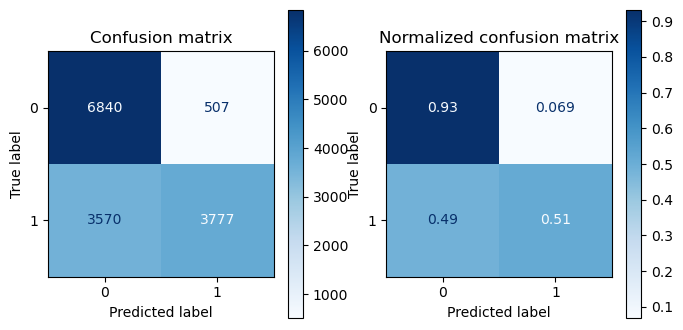

In [52]:
prediction = Binarizer(threshold=0.289).fit_transform(prediction_proba)
get_evaluation(y_test, prediction, grid_knn, X_test)